**CS 349 - Final Project (Option 3)**

Mihir Patel (Net-ID - MSP0513)

**Problem Statement (4) -** Human Activity Recognition Using Smartphones Data Set (UCI HAR Dataset)

This data set is collected from recordings of 30 human subjects captured via smartphones enabled with embedded inertial sensors. Each person performed six activities (Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing, Laying) wearing a smartphone (Samsung Galaxy S II) on the waist.  The experiments have been video-recorded to label the data manually. *The goal is to train a model which can predict human activity based on inertial sensors data.*

**Dataset Description:**
Dataset has 10,299 rows and 561 columns, partitioned into two sets of 70% (training data) and 30% (test data). 
The experiment uses embedded accelerometer and gyroscope, to capture 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz which are used as features.
There are 561 features for each recorded human activity. This 561 features can be grouped into major categories shown below:
tBodyAcc-XYZ, tGravityAcc-XYZ, tBodyAccJerk-XYZ, tBodyGyro-XYZ, tBodyGyroJerk-XYZ, tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag, fBodyAcc-XYZ, fBodyAccJerk-XYZ, BodyGyro-XYZ, fBodyAccMag, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag

**My Approach (overview):**
I wrote a *multi-class perceptron* code from scratch to fit the model and predict / classify the human actions.
For I used sklearn confusion_matrix and classification_report module for inferance and checking model accuracy.

A weight matrix of size 561 x 6 (i.e. feature_size x class_size) was initialized, each with value 1 for the beginning.

**Fit:** The code loops through each row of the training data. A sum of dot product of features and their corresponding weights was carried to determine activation. The activation corresponds to one of six human activities. If the activation is wrong, the feature value is subtracted from the weights of mis-classified category and added to the weights of actual category. The looping continues until convergence or maximum iterations are reached. Here, I chose number of mis-classifications in given iteration as convergence. The code  return the weight matrix 

**Prediction:** Using weight matrix, the code loops turough each row in testing data and labels it depending on activation. The output is compared to actual labels to test accuracy. 

**Experimentation:** The algorithm gives different accuracy, depending on value chosen for convergence and max-iteration. Hence, few different values of convergence/tolerance were tested with max_iteration = 200. A confusion matrix, accuracy vs epoch, and classification report was generated for each experimentation.

Github Link:

https://github.com/whomihirpatel/Machine_Learning/blob/master/Perceptron/final_project.ipynb

https://github.com/whomihirpatel/Machine_Learning/blob/master/Perceptron/final_project.py

Below is the code, followed by **Experimentation and Discussion at the end**

In [6]:
#Import Req Modules
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
#Import training and testing data
train_features = pd.read_csv('UCI HAR Dataset/train/X_train.txt',delimiter="\s+",header=None)
train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delimiter = "\s+",header=None)
test_features = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delimiter = "\s+",header=None)
test_labels = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delimiter = "\s+",header=None)

print("Training Features")
train_features.head(5)

Training Features


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [8]:
#Convert data to nparray
train_features= train_features.to_numpy()
train_labels= train_labels.to_numpy()
test_features= test_features.to_numpy()
test_labels= test_labels.to_numpy()

#Shape of training features and labels 
print(f'Shape of training features {train_features.shape},and labels{train_labels.shape}')
#Shape of test features and labels 
print(f'Shape of test features {test_features.shape},and labels{test_labels.shape}')

Shape of training features (7352, 561),and labels(7352, 1)
Shape of test features (2947, 561),and labels(2947, 1)


In [9]:
#Find corelation matrix
#corrMatrix = train_features.corr()

#Init some constants
feature_size = train_features.shape[1]
training_size = train_features.shape[0]
testing_size = test_features.shape[0]
class_size = 6

**Helper Functions**

In [10]:
def multi_class_weighted_sum(feature,weights):
    weighted_sum = [0 for x in range(class_size)]
    
    for index, weight in enumerate(weights):
        #print(index, weight)
        for i in range(feature_size):
            weighted_sum[index]+= weight[i] * feature[i]
    
    return weighted_sum

In [11]:
def multi_class_activation(weighted_sum):
    '''
    note: following numbers in training_label and test_label data refer to corresponding human actions
        1: Walking, 2: Walking_Upstairs, 3: Walking_downstairs, 4: Sitting, 5: Standing, 6:Laying
        In our weights we start from 0, hence we return 'index+1'
    '''
    max_weight = max(weighted_sum)
    index = weighted_sum.index(max_weight)

    return index + 1

In [12]:
def fit_perceptron(train_features,train_labels,tolerance, max_iteration):
    #Init weights of size feature_size x class_size
    weights = [[1 for x in range(feature_size)] for x in range(class_size)]
    training_size = train_features.shape[0]
    count = 0
    trigger = True
    error_array = []
    accuracy_array = []
    while trigger:
        error_counter = 0
        count +=1
        #Iterate through all training data
        for i in range(training_size):

            #extract features and labels
            bias_feature = train_features[i]
            label = train_labels[i][0]
            
            #Prediction
            w_sum = multi_class_weighted_sum(bias_feature,weights)
            output = multi_class_activation(w_sum)
            output_index = output-1
            label_index = label -1

            #Evaluation, if wrong update weights
            if output != label:
                
                #Update weights and error counter
                error_counter+=1
                
                for i in range(feature_size):
                    #subtract feature from incorrect weight and add feature to correct weight
                    weights[output_index][i] -= bias_feature[i]
                    weights[label_index][i] +=  bias_feature[i]

        
        #print(f'iteration: {count}, No. of errors: {error_counter}')
        accuracy = (training_size-error_counter)*100/training_size
        error_array.append(error_counter)
        accuracy_array.append(accuracy)
        #If error is less than tolerance or loop exceed max iteration, break the loop
        if error_counter<=tolerance or max_iteration<=count:
            #print correct weights
            #print(f'Correct weights {weights}')
            trigger = False
            best_accuracy = (training_size-error_counter)*100/training_size
            return weights, accuracy_array, error_array



In [13]:
def predict_perceptron(test_features,test_labels,perceptron_weights):
    #Testing
    errors = 0
    testing_size = test_features.shape[0]
    predict = np.zeros(testing_size)

    #Iterate through all testing data
    for i in range(testing_size):
        bias_feature = test_features[i]
        test_label = test_labels[i][0]

        #prediction
        w_sum = multi_class_weighted_sum(bias_feature,perceptron_weights)
        output = multi_class_activation(w_sum)
        #update output to dataset
        predict[i] = output

        if output!=test_label:
            errors+=1
        
    accuracy = (testing_size-errors)*100/testing_size
    return predict, accuracy

In [14]:
def plot_confusion(actual_labels, predicted_labels):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.title('Confusion Matrix')
    c_matrix = confusion_matrix(actual_labels, predicted_labels) 
    c_matrix_normalized = c_matrix / c_matrix.astype(np.float).sum(axis=1)
    axis_labels = ['Walking','Walking_Upstairs' ,'Walking_downstairs' ,'Sitting', 'Standing' ,'Laying']
    sn.heatmap(c_matrix, annot=True,xticklabels=axis_labels, yticklabels=axis_labels)
    plt.xlabel("Predicted") 
    plt.ylabel("Actual")
    #plt.rcParams['font.size'] = '5'
    plt.tight_layout()
    plt.show()
    plt.title('Normalized Confusion Matrix')
    axis_labels = ['Walking','Walking_Upstairs' ,'Walking_downstairs' ,'Sitting', 'Standing' ,'Laying']
    sn.heatmap(c_matrix_normalized, annot=True,xticklabels=axis_labels, yticklabels=axis_labels)
    plt.xlabel("Predicted") 
    plt.ylabel("Actual")
    #plt.rcParams['font.size'] = '5'
    plt.tight_layout()
    plt.show()

def plot_error(error_array,fit_accuracy):
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.plot(error_array)
    plt.xlabel("Iterations") 
    plt.ylabel("Number of Errors")
    plt.title('Errors vs. Epoch')
    plt.xticks(range(len(error_array)))
    plt.show()
    plt.plot(fit_accuracy)
    plt.xlabel("Iterations") 
    plt.ylabel("Accuracy")
    plt.title('Accuracy vs. Epoch')
    plt.xticks(range(len(fit_accuracy)))
    plt.show()
    

**Test for tolerance = 200** Training exits if 200 out of 7352 are mis-classified | Time taken: ~45 secs

fit accuracy: 97.30685527747552%, test accuracy: 79.70817780794027%
              precision    recall  f1-score   support

           1       0.96      0.93      0.95       496
           2       0.99      0.87      0.93       471
           3       0.87      0.95      0.91       420
           4       0.49      1.00      0.66       491
           5       0.90      0.21      0.35       532
           6       1.00      0.88      0.94       537

    accuracy                           0.80      2947
   macro avg       0.87      0.81      0.79      2947
weighted avg       0.87      0.80      0.78      2947



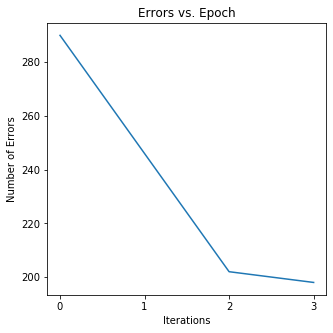

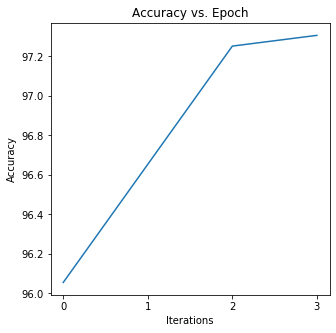

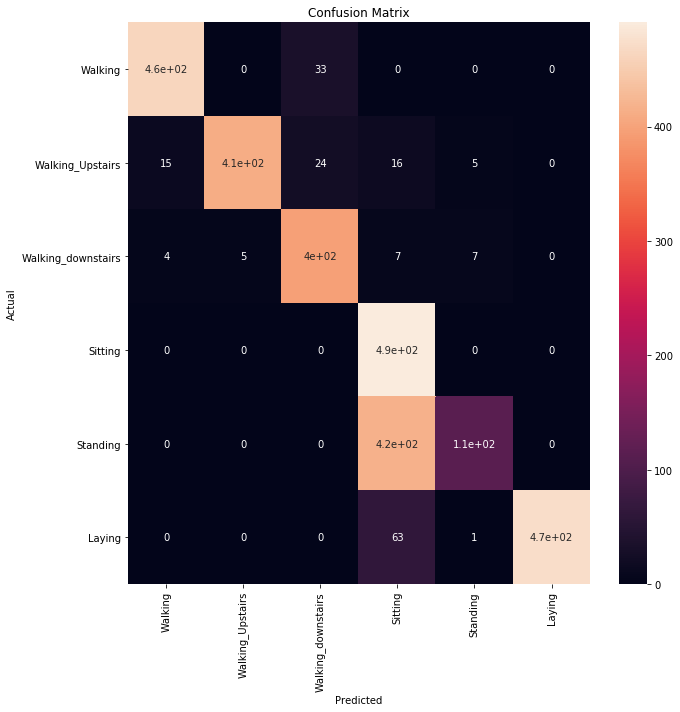

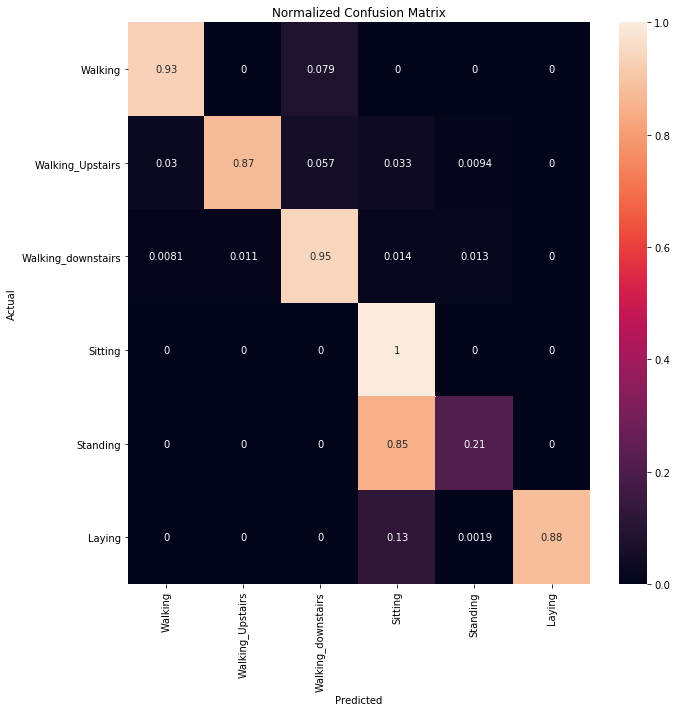

In [15]:
#Find weights using train data         
perceptron_weights, fit_accuracy, error_array = fit_perceptron(train_features,train_labels,tolerance=200,max_iteration=200)
#Predict using test data
perceptron_predict,test_accuracy = predict_perceptron(test_features,test_labels,perceptron_weights)

#Check accuracy of fit and test data
print(f'fit accuracy: {fit_accuracy[-1]}%, test accuracy: {test_accuracy}%')

#classification_report
print(classification_report(test_labels, perceptron_predict))
#print(f'Perceptron_weights: {perceptron_weights}%')

#Plot Error vs Iterations
plot_error(error_array,fit_accuracy)
#Plot Confusion matrix
plot_confusion(test_labels, perceptron_predict)

**Test for tolerance = 100** Training exits if 100 out of 7352 are mis-classified | Time taken: ~120 secs

fit accuracy: 98.63982589771491%, test accuracy: 91.17746861214795%
              precision    recall  f1-score   support

           1       1.00      0.79      0.88       496
           2       0.90      0.93      0.91       471
           3       0.80      0.97      0.88       420
           4       0.83      0.98      0.90       491
           5       0.98      0.81      0.89       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.91      0.91      2947



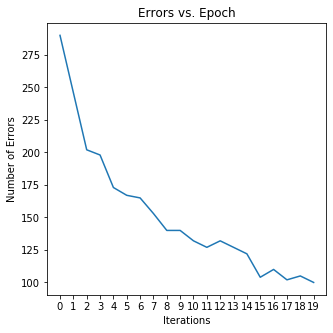

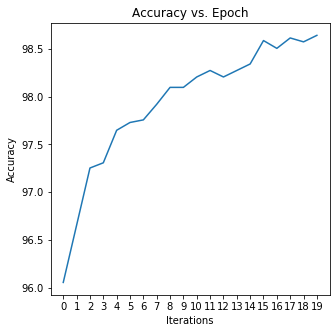

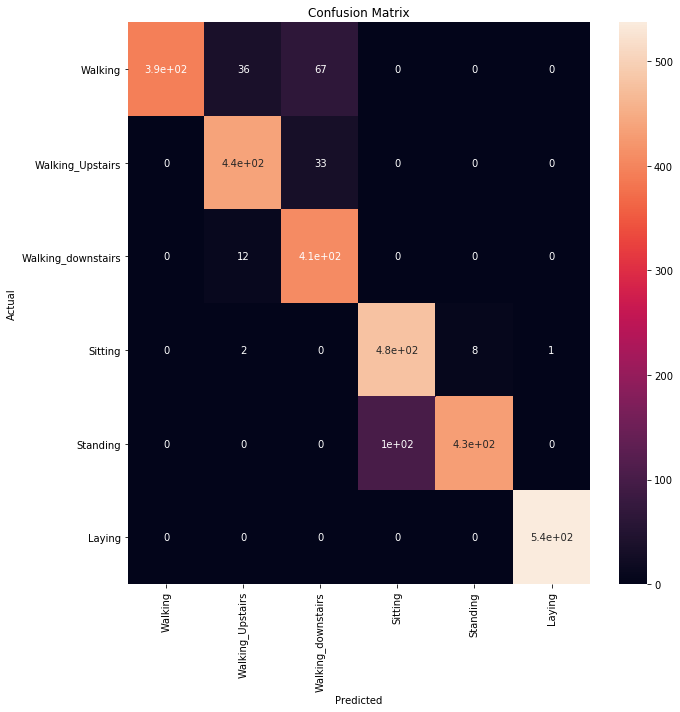

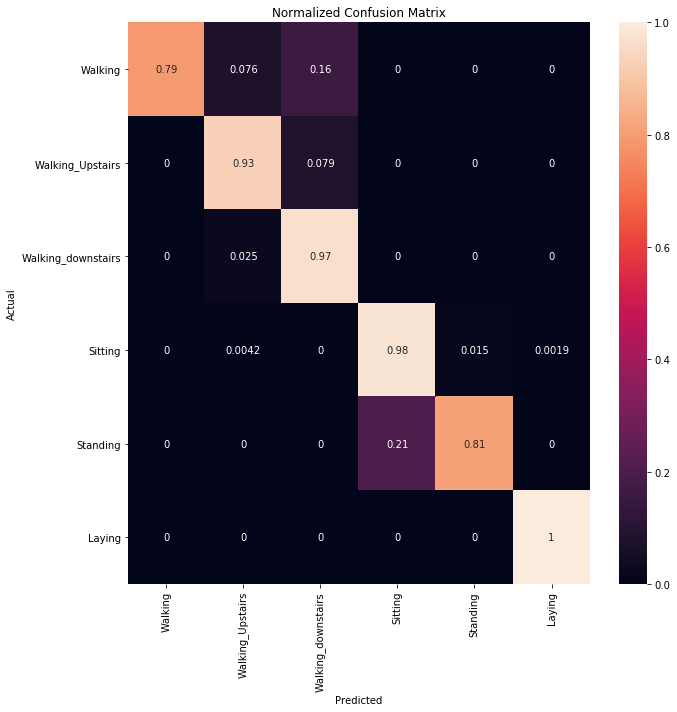

In [17]:
#Find weights using train data         
perceptron_weights, fit_accuracy, error_array = fit_perceptron(train_features,train_labels,tolerance=100,max_iteration=200)
#Predict using test data
perceptron_predict,test_accuracy = predict_perceptron(test_features,test_labels,perceptron_weights)

#Check accuracy of fit and test data
print(f'fit accuracy: {fit_accuracy[-1]}%, test accuracy: {test_accuracy}%')

#classification_report
print(classification_report(test_labels, perceptron_predict))

#print(f'Perceptron_weights: {perceptron_weights}%')

#Plot Error vs Iterations
plot_error(error_array,fit_accuracy)
#Plot Confusion matrix
plot_confusion(test_labels, perceptron_predict)


**Test for tolerance = 50** Training exits if 50 out of 7352 are mis-classified | Time taken: ~12 mins

fit accuracy: 99.37431991294886%, test accuracy: 93.72242958941297%
              precision    recall  f1-score   support

           1       0.96      0.97      0.97       496
           2       0.94      0.96      0.95       471
           3       0.97      0.94      0.96       420
           4       0.96      0.79      0.87       491
           5       0.83      0.97      0.89       532
           6       0.99      0.99      0.99       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



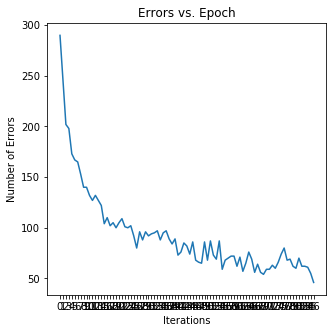

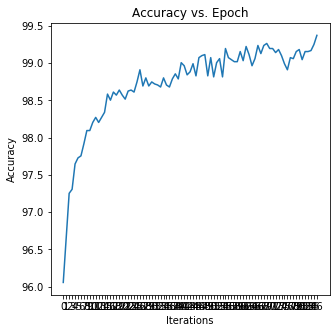

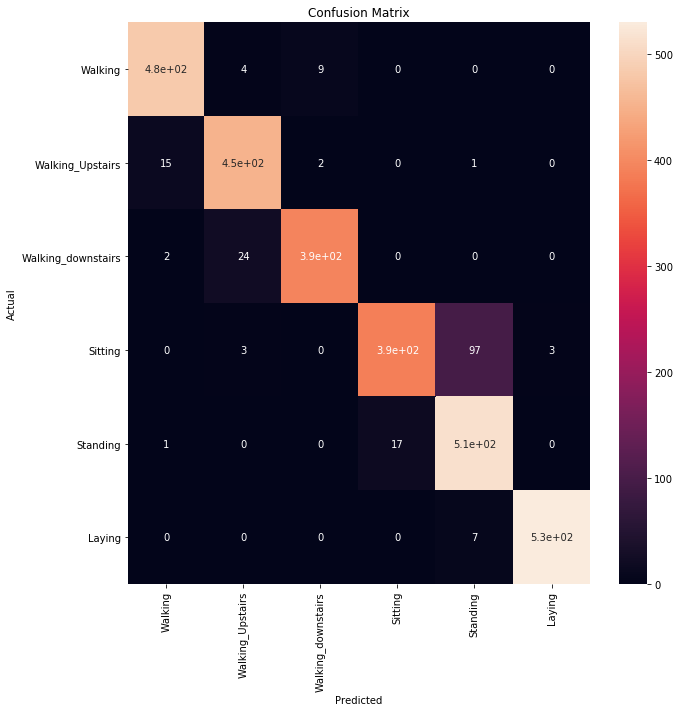

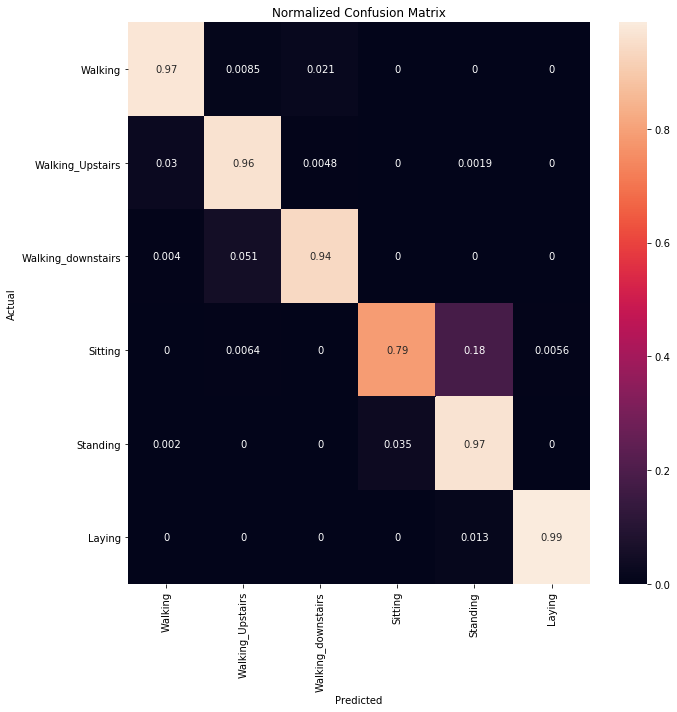

In [18]:
#Find weights using train data         
perceptron_weights, fit_accuracy, error_array = fit_perceptron(train_features,train_labels,tolerance=50,max_iteration=200)
#Predict using test data
perceptron_predict,test_accuracy = predict_perceptron(test_features,test_labels,perceptron_weights)

#Check accuracy of fit and test data
print(f'fit accuracy: {fit_accuracy[-1]}%, test accuracy: {test_accuracy}%')

#classification_report
print(classification_report(test_labels, perceptron_predict))
#print(f'Perceptron_weights: {perceptron_weights}%')

#Plot Error vs Iterations
plot_error(error_array,fit_accuracy)
#Plot Confusion matrix
plot_confusion(test_labels, perceptron_predict)


**Discussion**
- For tolerance = 200, the fit accuracy was 97%, but the test accuracy was low at 79%. It took only 4 Epoch to converge (in 45 seconds).
- For tolerance = 100, the fit accuracy was 98%, the test accuracy increased to 91%. It took 19 Epoch to converge (in 120 seconds).
- For tolerance = 50, the fit accuracy was 99%, the test accuracy was 94%. It took 156 Epoch to converge (in 12 mins).

Considering the number of epoches, time taken and accuracy, for tolerance =50, the model might have overfit. Hence tolerance = 100 can be considered as optimal choice. The increase in test accuracy for t = 200 to t = 100 is significant, but not much significant for t= 100 and t = 50.

The normalized confusion matrix shows, for t = 200 and t = 100, majorly "standing" was wrongly predicted as "sitting" and "walking" as "walking_upstairs"
The number of misclassification reduced as t was lowered, but interestingly, for t = 50, the model wrongly predicted "sitting as "standing" which was not the case (rather was the opposite) for t = 200 and t = 100. This could be due to overfitting at t=50.

**Resources Used:**

http://proceedings.mlr.press/v97/beygelzimer19a/beygelzimer19a-supp.pdf

http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones